<a href="https://colab.research.google.com/github/ramanuj-neoma/ramanuj-neoma/blob/main/DIS_quotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pa
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
df = pa.read_excel("/content/sample_data/DIS_quotes_full.xlsx",sheet_name="DIS_quotes_full", 
                   header=0, index_col=None,
                   dtype={'Name': str, 'Value' : float})

In [4]:
# dataset properties

#df.index #size
#df.dtypes # nature of data by column
#df.columns # column headers

##################################
# Select the day

theday = pa.Timestamp(year=1998, month=8, day=3, hour=00)
k1 = df.values[:,1] == theday
# Optional: Filters
k2 = df.values[:,3] > 0  # bid
k3 = df.values[:,4] > 0  # bid size
k4 = df.values[:,5] > 0  # ask
k5 = df.values[:,6] > 0  # ask size

K = k1 & k2 & k3 & k4 & k5 

tr_day = df.values[K,1]
hms = df.values[K,2]
bid = df.values[K,3] 
ask = df.values[K,4]
bidsize = df.values[K,5]
asksize = df.values[K,6] 
trademode = df.values[K,7] 
sexc =  df.values[K,8]
mm = df.values[K,9]

In [5]:
#################################
ticker = np.unique(df.values[:,0])

#################################
# Date and time
beg_time = min(hms)
end_time = max(hms)

#################################
# Best bid and ask of the day

bestbid = np.max(bid)
bestask = np.min(ask)

###############################
# average bid/ask spread
avebalvl = np.mean(ask-bid)
avebaper = np.mean((ask-bid)/(0.5*(ask+bid)))

###############################
# Summary file

print('Ticker:', ticker)
print('Trading day:',theday)
print('Time range: From',beg_time,'to',end_time)
print('Best bid of the day:',np.round(bestbid,2))
print('Best ask of the day:',np.round(bestask,2))
print('Average bid ask spread ($):',np.round(avebalvl,2))
print('Average bid ask spread (%):',np.round(100*avebaper,4))

Ticker: ['DIS']
Trading day: 1998-08-03 00:00:00
Time range: From 09:32:41 to 16:13:42
Best bid of the day: 34.94
Best ask of the day: 34.56
Average bid ask spread ($): 0.21
Average bid ask spread (%): 0.5986


In [6]:
# Generate a sumamry file through a function:
def MyDailyStats2(db,yyyy,mm,dd):
    theday = pa.Timestamp(year=yyyy, month=mm, day=dd, hour=00)
    k1 = db.values[:,1] == theday
    k2 = db.values[:,3] > 0  # bid
    k3 = db.values[:,4] > 0  # bid size
    k4 = db.values[:,5] > 0  # ask
    k5 = db.values[:,6] > 0  # ask size
    K = k1 & k2 & k3 & k4 & k5 
    hms = db.values[K,2]
    bid = db.values[K,3] 
    ask = db.values[K,4]
    mm = db.values[K,9]
    beg_time = min(hms)
    end_time = max(hms)
    bestbid = np.max(bid)
    bestask = np.min(ask)
    avebalvl = np.mean(ask-bid)
    avebaper = np.mean((ask-bid)/(0.5*(ask+bid)))
    print('Trading day:',theday)
    print('Time range: From',beg_time,'to',end_time)
    print('Best bid of the day:',np.round(bestbid,2))
    print('Best ask of the day:',np.round(bestask,2))
    print('Average bid ask spread ($):',np.round(avebalvl,2))
    print('Average bid ask spread (%):',np.round(100*avebaper,4))
    print('')

9
10
11
12
13
14
15


([<matplotlib.axis.XTick at 0x7f8bdc535690>,
 [Text(0, 0, '9-10 am'),
  Text(0, 0, '10-11 am'),
  Text(0, 0, '11-12 am'),
  Text(0, 0, '12am-1pm'),
  Text(0, 0, '1-2 pm'),
  Text(0, 0, '2-3 pm'),
  Text(0, 0, '3-4 pm')])

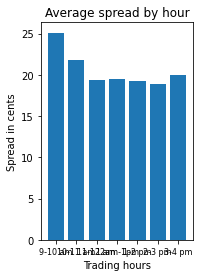

In [7]:
##############################
# Spread by hour

HMS = np.empty(len(hms),dtype=object)
for x in range(len(hms)):
    HMS[x] = dt.datetime.combine(theday,hms[x])
    
ba_bh = np.zeros(7)*np.nan

for i in range(9,16):
    print(i)
    k = (HMS > dt.datetime(1998,8,3,i,0,0)) & \
    (HMS < dt.datetime(1998,8,3,i+1,0,0))
    ba_bh[i-9] = 100*np.mean(ask[k]-bid[k])
    
x = np.arange(7)  
trng = ('9-10 am', '10-11 am', '11-12 am', '12am-1pm', \
        '1-2 pm','2-3 pm','3-4 pm') 

plt.subplot(1,2,1)
plt.bar(x,ba_bh)
plt.title('Average spread by hour')
plt.xlabel('Trading hours')
plt.ylabel('Spread in cents')
plt.xticks(x, trng,fontsize=8)